<a href="https://colab.research.google.com/github/rammya29/Goeduhub-STP/blob/main/Assignment_Task_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment / Task - 12

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

1. Measure accuracy of your model using different kernels such as rbf and linear.
2. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
3. Use 80% of samples as training data size

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns

In [ ]:
digits=load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [ ]:
df=pd.DataFrame(digits.data)
print(df.head())

    0    1    2     3     4     5    6   ...   57   58    59    60    61   62   63
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  ...  0.0  6.0  13.0  10.0   0.0  0.0  0.0
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  ...  0.0  0.0  11.0  16.0  10.0  0.0  0.0
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  ...  0.0  0.0   3.0  11.0  16.0  9.0  0.0
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  ...  0.0  7.0  13.0  13.0   9.0  0.0  0.0
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  ...  0.0  0.0   2.0  16.0   4.0  0.0  0.0

[5 rows x 64 columns]


In [ ]:
print(df.shape)

(1797, 64)


In [ ]:
df.columns

RangeIndex(start=0, stop=64, step=1)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [ ]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
print(digits.data.shape)

(1797, 64)


In [ ]:
print(digits.target.shape)

(1797,)


In [ ]:
df.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [ ]:
df.values

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  9.,  0.,  2.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  2., ...,  0.,  0.,  9.],
       [ 0.,  0., 10., ...,  1.,  0.,  8.]])

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop(['target'],axis='columns')
y=df.target
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
print(len(x_train))

1437


In [ ]:
print(len(x_test))

360


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

model1=SVC(kernel='rbf',random_state=0, probability=True)
model1.fit(x_train,y_train)
y_pred_1=model1.predict(x_test)
print("Model Score of Kernal(rbf) :", model1.score(x_test,y_test))

Model Score of Kernal(rbf) : 0.9916666666666667


In [ ]:
model2=SVC(kernel='linear',random_state=0, probability=True)
model2.fit(x_train,y_train)
y_pred_2=model2.predict(x_test)
print("Model Score of Kernal(linear) :", model2.score(x_test,y_test))

Model Score of Kernal(linear) : 0.975


In [ ]:
model3=SVC(kernel='poly',random_state=0, probability=True)
model3.fit(x_train,y_train)
y_pred_3=model3.predict(x_test)
print("Model Score of Kernal(poly) :", model3.score(x_test,y_test))

Model Score of Kernal(poly) : 0.9944444444444445


In [ ]:
accuracy=accuracy_score(y_test,y_pred_3)
print('ACCURACY is',accuracy)

ACCURACY is 0.9944444444444445


In [ ]:
from sklearn.metrics import confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred_3))
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]])

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_3)
mse

0.08888888888888889

In [ ]:
model1_C=SVC(C=3)
model1_C.fit(x_train,y_train)
model1_C.score(x_test,y_test)

0.9944444444444445

In [ ]:
model2_C=SVC(C=3)
model2_C.fit(x_train,y_train)
model2_C.score(x_test,y_test)

0.9944444444444445

In [ ]:
model3_C=SVC(C=3)
model3_C.fit(x_train,y_train)
model3_C.score(x_test,y_test)

0.9944444444444445

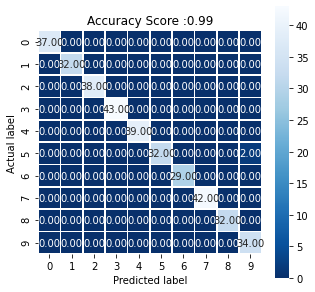

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{accuracy:.2f}'
plt.title(A)
plt.show()



---



##END OF ASSIGNMENT

**Author** : Rammya Dharshini K

**Date** : 15-06-2021

**Reg.ID** : GO_STP_1613